# Ahsanul Choudhury

## DATA 602 HW 11

Perform a Monte Carlo simulation to calculate Value at Risk (VaR) for the Apple stock price using the file attached to this lesson. There exist a number of ways to do this type of analysis, but you can follow this basic procedure (refer to this PDF mc.pdf 

 for a more rigorous mathematical overview):

   1.The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is      the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding      row.

   2.Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-                distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.

   3.With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.

   4.Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this,      take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent          change.  Do this for the 20 randoms, and get a final price.

   5.Store the final price after 20 days (you can discard the intermediate price values).
   
   6.Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.

   7.Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result,      and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a            confidence level of 99%.

The other requirement for this assignment is to use an IPython Notebook.  Include in the notebook all the code, the results, and any other information you feel is needed (charts, graphs, plots, etc).  Rather than submitting .py files, give me the .ipynb file for your notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/choudhury1023/DATA-602/master/apple.2011.csv', skiprows = 1,
                    names = ['date', 'price', 'pct_change'])
print apple.head(5)
print apple.shape

       date   price    pct_change
0  1/3/2011  329.57         XXXXX
1  1/4/2011  331.29   0.005218922
2  1/5/2011  334.00   0.008180144
3  1/6/2011  333.73  -0.000808383
4  1/7/2011  336.12   0.007161478
(252, 3)


Calculate the mean and standard deviation.

In [3]:
apple['pct_change'] = pd.to_numeric(apple['pct_change'], errors='coerce')
mu = np.mean(apple['pct_change'])
sigma = np.std(apple['pct_change'])
print "mu =", mu, "sigma =", sigma

mu = 0.000957355207171 sigma = 0.0164876139799


Starting price:

In [4]:
last_price = apple['price'].iloc[-1]
last_price

405.0

Random number generator and 20 random numbers:

In [5]:
np.random.seed(7)
rand_gen = np.random.normal(loc= mu, scale= sigma, size=20)
rand_gen

array([ 0.02883009, -0.00672484,  0.00149848,  0.00767633, -0.0120501 ,
        0.00099141,  0.00094267, -0.02797386,  0.01773611,  0.01085814,
       -0.00935448, -0.00187107,  0.00928854, -0.00335179, -0.003045  ,
       -0.02300313,  0.01010106,  0.00299986,  0.00548254, -0.02421139])

Hypothetical price after 20 days:

In [6]:
def get_price(sim_price, days, mu, sigma):
    return sim_price * np.prod(np.random.normal(loc = mu, scale = sigma, size = days) + 1)

np.random.seed(7)
get_price(last_price, 20, mu ,sigma)

398.14777150971571

Simulate 10,000 times:

In [7]:
results = []
for i in range(10000):
    results.append(get_price(last_price, 20, mu ,sigma))
        
results[:5]

[398.18554133119807,
 422.4156731662689,
 394.82448359069042,
 456.1186810319449,
 429.22662140268682]

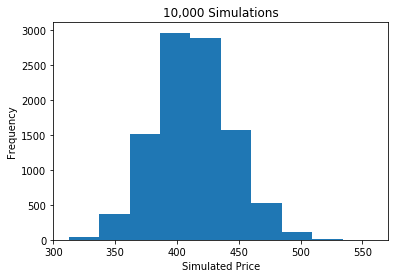

In [8]:
plt.hist(results)
plt.title("10,000 Simulations")
plt.xlabel("Simulated Price")
plt.ylabel("Frequency")
plt.show()

 VaR with 99% confidence

In [9]:
VaR_99 = np.percentile(results,1)
VaR_99

345.61448687715767